In [1]:
import pandas as pd

In [18]:
df = pd.read_csv("../data/final experiment-table.csv", skiprows = 6)

# Dropping irrelevant columns
df = df.drop(['percentage-female', 'percentage-stationary-staff', 
              'percentage-children', 'alarm?', 'agents-at-start', 
              'verbose?', 'debug?', 'alerting-range', 'average-response-time',
              'people-in-building.1', 'staff-members-in-building.1', 
              'visitors-in-building.1', '[step]', 'max-turtles-per-patch'],1)
changes = {'precision ((count visitors with [evacuating? = false] / count visitors) * 100) 2': 'percentage_evacuating',
           '[run number]': 'run_number'}

# Renaming relevant column
df = df.rename(columns = changes)
df

,run_number,percentage-visitors-go-to-main-door,percentage_evacuating,people-in-building,evacuation-duration,event-duration,staff-members-in-building,visitors-in-building
0,6,0,100,450,0,0,50,400
1,6,0,100,450,0,1,50,400
2,6,0,100,450,0,2,50,400
3,6,0,100,450,0,3,50,400
4,6,0,100,450,0,4,50,400
...,...,...,...,...,...,...,...,...
175282,450,100,0,1,336,366,0,1
175283,450,100,0,1,337,367,0,1
175284,450,100,0,1,338,368,0,1
175285,450,100,0,1,339,369,0,1


In [23]:
run_averages = df.groupby(['run_number']).mean()
run_averages

,percentage-visitors-go-to-main-door,people-in-building,evacuation-duration,event-duration,staff-members-in-building,visitors-in-building
run_number,,,,,,
1,0.0,167.371765,183.094118,212.0,27.680000,139.691765
2,0.0,179.610526,160.723684,189.5,29.594737,150.015789
3,0.0,162.675418,180.109785,209.0,25.849642,136.825776
4,0.0,174.114286,163.207792,192.0,29.425974,144.688312
5,0.0,180.545706,151.288089,180.0,32.991690,147.554017
...,...,...,...,...,...,...
446,100.0,186.935401,164.201550,193.0,30.452196,156.483204
447,100.0,194.469657,160.226913,189.0,31.068602,163.401055
448,100.0,194.631148,153.770492,182.5,31.079235,163.551913


In [25]:
evacuation_duration = run_averages.groupby(['percentage-visitors-go-to-main-door']).mean()
evacuation_duration

,people-in-building,evacuation-duration,event-duration,staff-members-in-building,visitors-in-building
percentage-visitors-go-to-main-door,,,,,
0.0,180.071530,159.152544,187.91,31.080349,148.991182
5.0,177.547634,162.174148,190.95,30.130902,147.416732
10.0,182.573738,156.907705,185.65,31.263486,151.310251
25.0,176.734479,163.941546,192.73,30.129207,146.605272
50.0,181.678055,162.260920,191.04,30.913979,150.764076
75.0,180.072931,168.094040,196.91,30.695457,149.377474
90.0,183.206154,168.124955,196.94,30.816512,152.389641
95.0,179.524786,174.307717,203.16,30.177597,149.347189
100.0,181.766794,174.225724,203.08,30.543671,151.223123


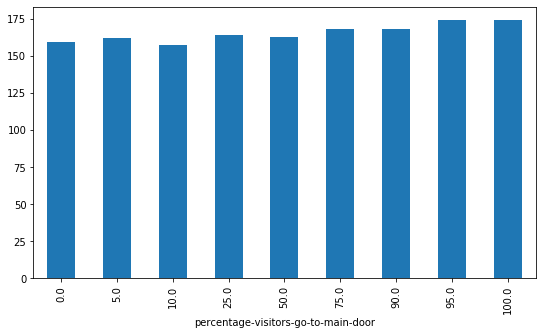

In [30]:
evacuation_duration['evacuation-duration'].plot.bar(figsize = (9,5))